#**Bioseñales y sistemas**
##**Práctica 3 Parte 1: Análisis estadístico de señales**
####Maria Alejandra Escobar - C.C 1004425012
####Juan Manuel Martínez - C.C 1007739919

##**Librerías**

In [1]:
#Importación de librerías necesarias para el desarrollo de la práctica
import scipy.io as sio
import numpy as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

##**Carga de datos**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ecg=sio.loadmat('signals.mat')

#**Procedimiento**

###**Implementación de funciónes**

**Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como:**

$RMS=((\sum_{n=0}^{N}x^2)/N)^{0.5}$

In [4]:
def calcularRMS(X):
  N=X.size #Cantidad de puntos
  rms=(np.sum(X**(2))/N)**0.5
  return rms

Para la creación de la función, se utiliza la función size, la cual calcula la cantidad de puntos del vector. Con esta información, se aplica la fórmula que calcula el valor RMS y luego se retorna.

##**Análisis estadístico ECG**

**Creación del vector tiempo a partir de la información suministrada en el archivo .mat**

In [5]:
t=(1/1024)
Vtiempo=np.arange(0,ecg['ECG_asRecording'].size*t,t)
tiempo_total = Vtiempo[-1]
print('El tiempo total de la señal es',tiempo_total)
print(Vtiempo)
print(len(Vtiempo))

El tiempo total de la señal es 29.9990234375
[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]
30720


El tiempo de duración de la señal EMG se calculó con la frecuencia de muestro, con la cual se obtuvo el periodo de la señal. A partir de este, y con el número de muestras tomadas, resultó el tiempo de duración total de la señal en aproximadamente 30 segundos.

**Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG**

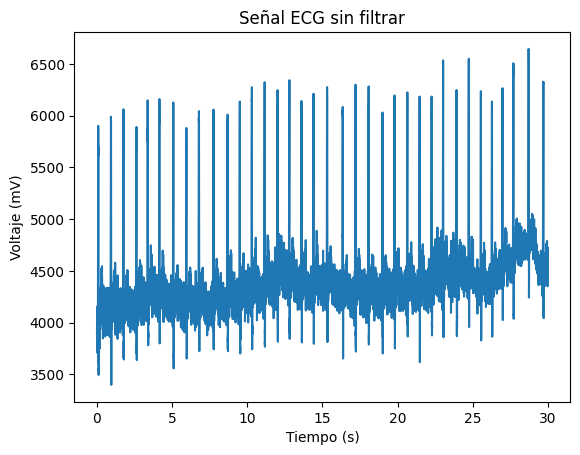

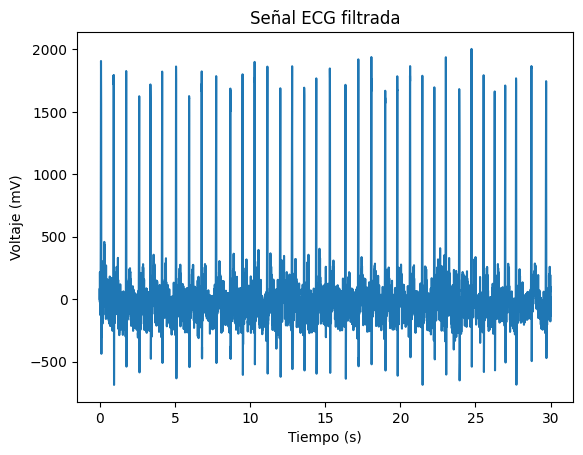

In [6]:
plt.plot(Vtiempo,ecg['ECG_asRecording'][0,:30720])
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Señal ECG sin filtrar')
plt.show()

plt.plot(Vtiempo,ecg['ECG_filtered'][0,:30720])
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Señal ECG filtrada')
plt.show()

Las dos gráficas correspondientes a una señal ECG sin filtrar y filtrada respectivamente tienen diferencias notables a simple vista. En primera instancia, la gráfica 1 muestra una señal con un offset de aproximadamente 4.1 V y se observa un ruido a baja frecuencia presente, de aproxiamdamente 0.20 Hz. Teniendo en cuenta que la frecuencia característica del ECG se encuentra entre los 1 y 40 Hz, la presencia de esta frecuencia en la señal se puede caracterizar como ruido. En el caso de la gráfica 2, se observa que el filtrado eliminó el offset de entrada que tenía la señal, además, se eliminó el ruido a muy baja frecuencia que existía en la señal original. 
A partir del análisis se puede determinar que se utilizó un filtro pasa altas, con una frecuencia de corte más baja que la frecuencia característica del ECG, lo que produjo la elminación del ruido.

**Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.**

Valor máximo entre 0 y 0.5 segundos de la señal original:  5900.6142578125
Indice de este valor en la señal:  88
Valor máximo entre 0.5 y 1 segundo de la señal original:  5988.81884765625
Indice de este valor en la señal:  953


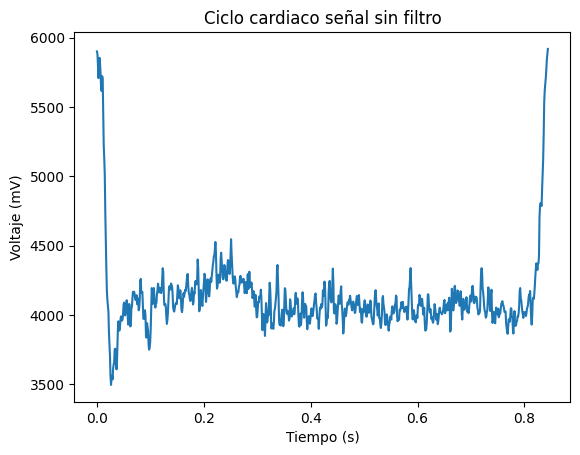

In [11]:
from operator import index
rec1=ecg['ECG_asRecording'][0,:512] #Creación de un arreglo desde 0 hasta medio segundo, pues en 30 segundos hay 30720.
max1=np.max(rec1)  # Se busca el valor máximo en rec1.
index_max1=rec1.tolist().index(max1)
print('Valor máximo entre 0 y 0.5 segundos de la señal original: ', max1)
print('Indice de este valor en la señal: ', index_max1)

rec2=ecg['ECG_asRecording'][0,512:1024] #Se creó un arreglo desde 0.5 hasta 1 segundo.
max2=np.max(rec2) #Se busca el valor máximo en rec2
rec22=ecg['ECG_asRecording'][0,:1024]  #Se creó un arreglo desde 0 hasta un segundo.
index_max2=np.argmax(rec22==5988.81884765625) #busco el índice del valor máximo hallado.
print('Valor máximo entre 0.5 y 1 segundo de la señal original: ', max2)
print('Indice de este valor en la señal: ', index_max2)

ciclo=ecg['ECG_asRecording'][0,index_max1:index_max2]

Vtiempo3=np.arange(0,ciclo.size*t,t)
plt.plot(Vtiempo3,ciclo)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Ciclo cardiaco señal sin filtro')
plt.show()

In [11]:
Rms_1= calcularRMS(ciclo)
promedio=np.mean(ciclo)
varianza=np.var(ciclo)
print("El valor RMS es: " ,Rms_1)
print("El promedio es: ",promedio)
print("La varianza es: ",varianza)

El valor RMS es:  4142.454957820607
El promedio es:  4131.136266878161
La varianza es:  93646.2220564969


*Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.*

**Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.**

Valor máximo entre 0 y 0.5 segundos de la señal filtrada:  1906.7260952319396
Indice de este valor en la señal:  88
Valor máximo entre 0.5 y 1 segundo de la señal original:  1794.5044897028638
Indice de este valor en la señal:  952


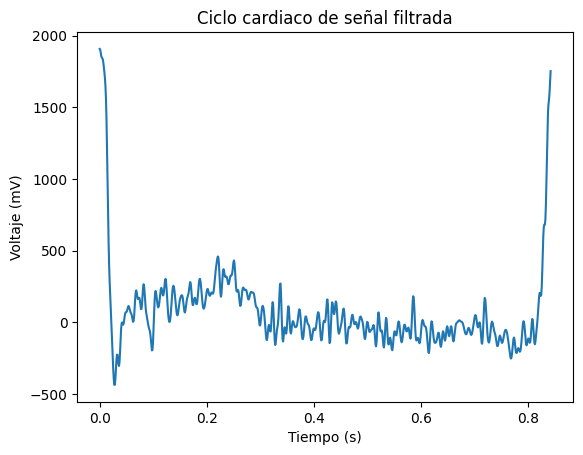

In [13]:
from operator import index
rec1f=ecg['ECG_filtered'][0,:512] #Se creó un arreglo desde 0 hasta medio segundo, sabiendo que por 30 segundos hay 30720.
max1f=np.max(rec1f)  # Se busca el valor máximo en rec1f.
index_max1f=rec1f.tolist().index(max1f)
print('Valor máximo entre 0 y 0.5 segundos de la señal filtrada: ', max1f)
print('Indice de este valor en la señal: ', index_max1f)

rec2f=ecg['ECG_filtered'][0,512:1024] #Se creó un arreglo desde 0.5 hasta 1 segundo.
max2f=np.max(rec2f) #Se busca el valor máximo en rec2f
rec22f=ecg['ECG_filtered'][0,:1024]  #Se creó un arreglo desde 0 hasta un segundo.
index_max2f=np.argmax(rec22f==1794.5044897028638) #busco el índice del valor máximo hallado.
print('Valor máximo entre 0.5 y 1 segundo de la señal original: ', max2f)
print('Indice de este valor en la señal: ', index_max2f)

ciclof=ecg['ECG_filtered'][0,index_max1f:index_max2f]

Vtiempo4=np.arange(0,ciclof.size*t,t)
plt.plot(Vtiempo4,ciclof)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Ciclo cardiaco de señal filtrada')
plt.show()

In [14]:
Rms_f=calcularRMS(ciclof)
promediof=np.mean(ciclof)
varianzaf=np.var(ciclof)
print("El valor RMS es: " ,Rms_f)
print("El promedio es: ",promediof)
print("La varianza es: ",varianzaf)


El valor RMS es:  319.62757818893766
El promedio es:  74.00995782055861
La varianza es:  96684.31488232457


*Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.*

**Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?**

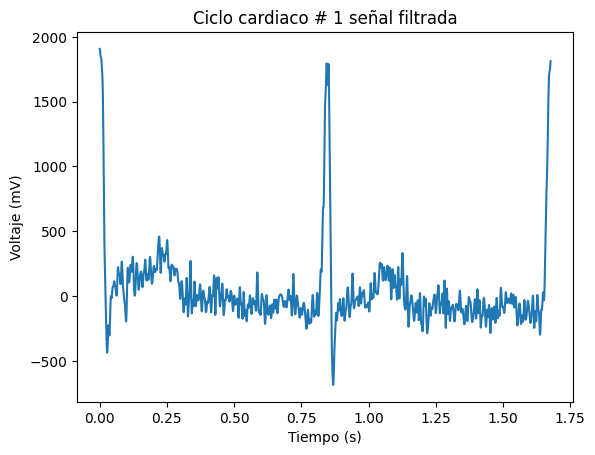

El valor de la varianza del ciclo 1 es 102137.77603759158
El valor del promedio del ciclo 1 es 36.49334213792569


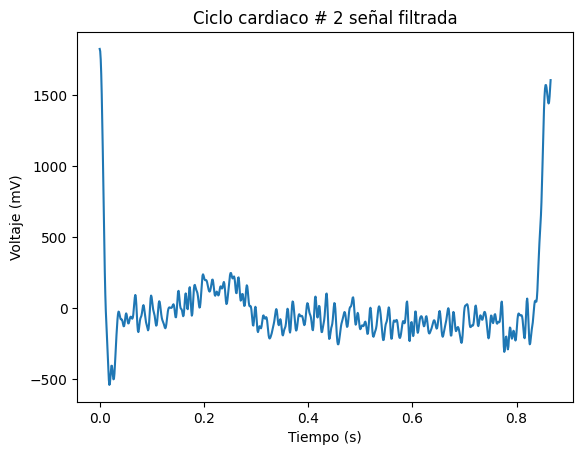

El valor de la varianza del ciclo 2 es 82451.25107858983
El valor del promedio del ciclo 2 es -10.433000231133212


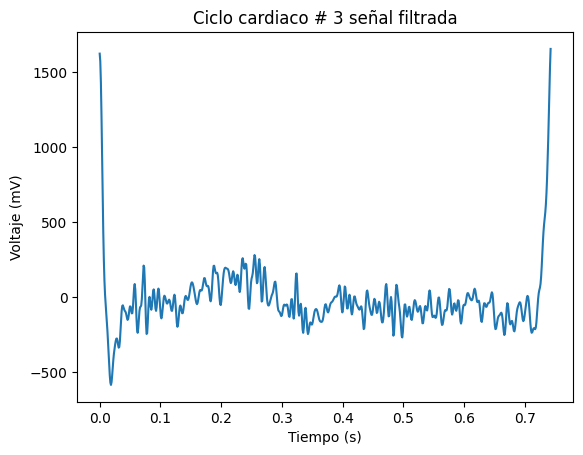

El valor de la varianza del ciclo 3 es 46839.01969414558
El valor del promedio del ciclo 3 es -20.975177997377532


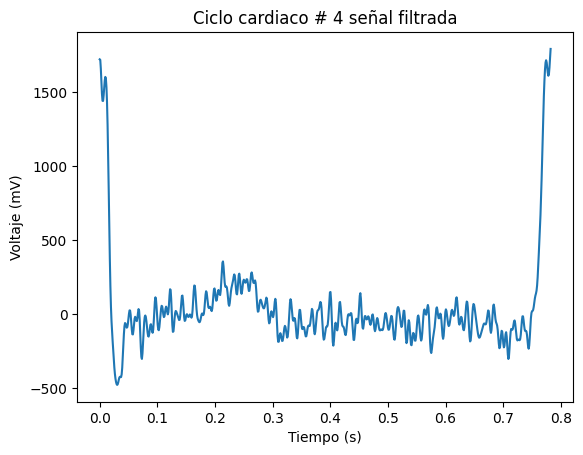

El valor de la varianza del ciclo 4 es 114850.02006450474
El valor del promedio del ciclo 4 es 40.87110478533409


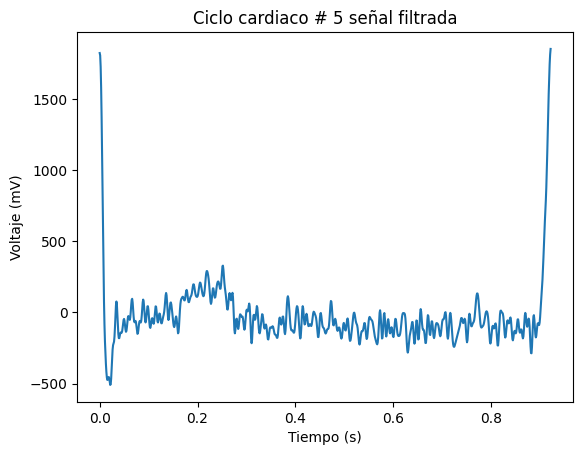

El valor de la varianza del ciclo 5 es 58147.589511512415
El valor del promedio del ciclo 5 es -27.94373421958412


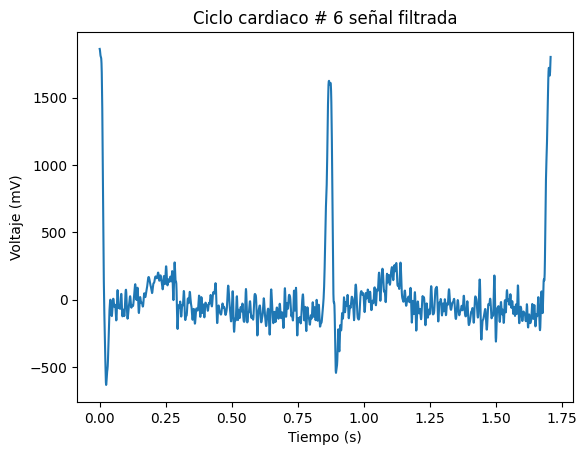

El valor de la varianza del ciclo 6 es 88910.67039657266
El valor del promedio del ciclo 6 es 10.745410786494254


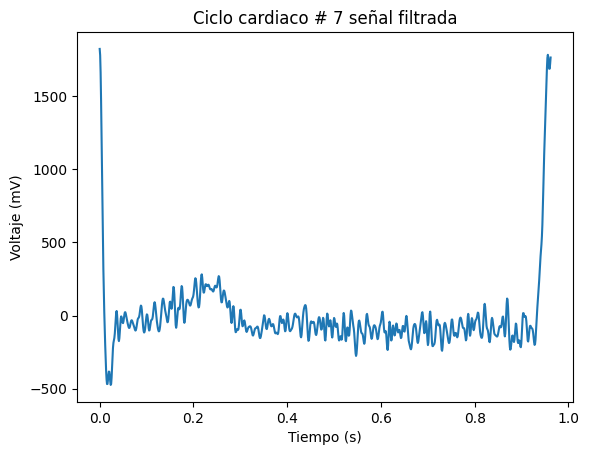

El valor de la varianza del ciclo 7 es 71784.95578593282
El valor del promedio del ciclo 7 es -10.175289840749373


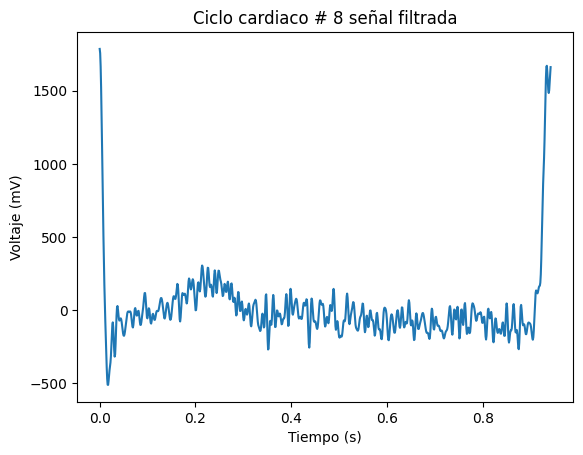

El valor de la varianza del ciclo 8 es 68481.05976260055
El valor del promedio del ciclo 8 es 8.81210265962322


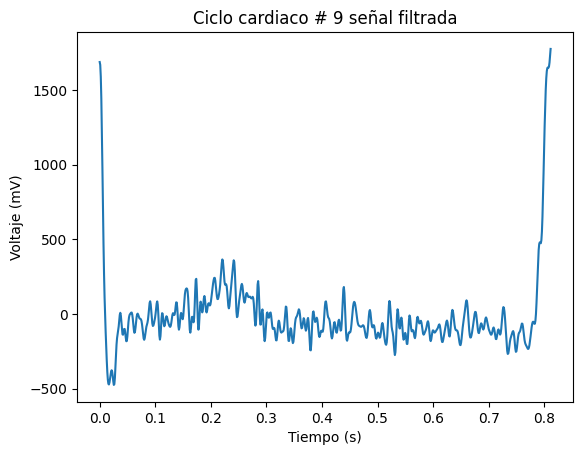

El valor de la varianza del ciclo 9 es 76088.38489781879
El valor del promedio del ciclo 9 es -8.906158250191359


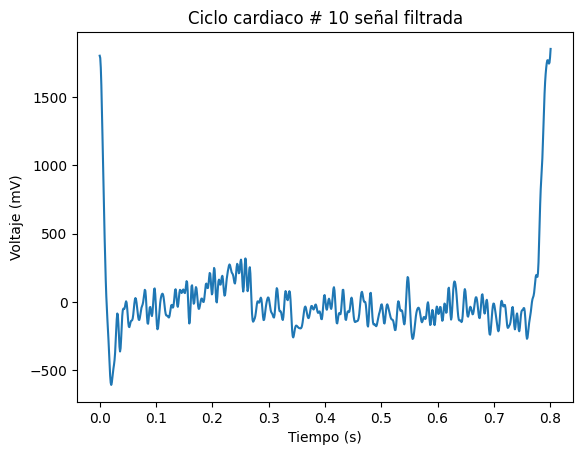

El valor de la varianza del ciclo 10 es 93862.69588330528
El valor del promedio del ciclo 10 es 13.21327398140507


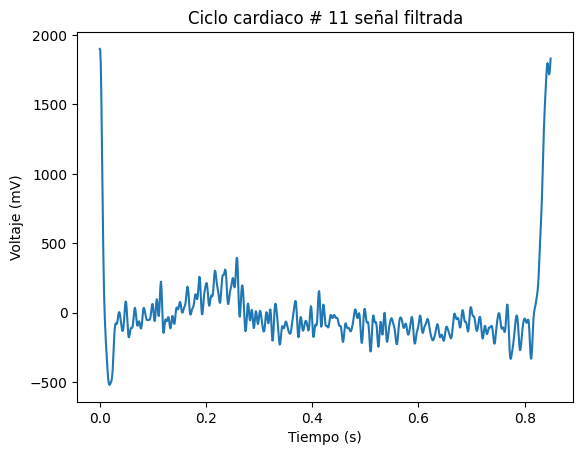

El valor de la varianza del ciclo 11 es 87951.50447594067
El valor del promedio del ciclo 11 es -4.203262548456708


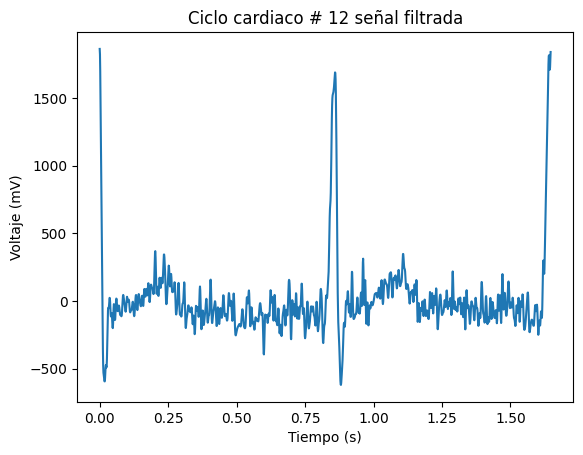

El valor de la varianza del ciclo 12 es 83498.41067928342
El valor del promedio del ciclo 12 es 5.158912206151375


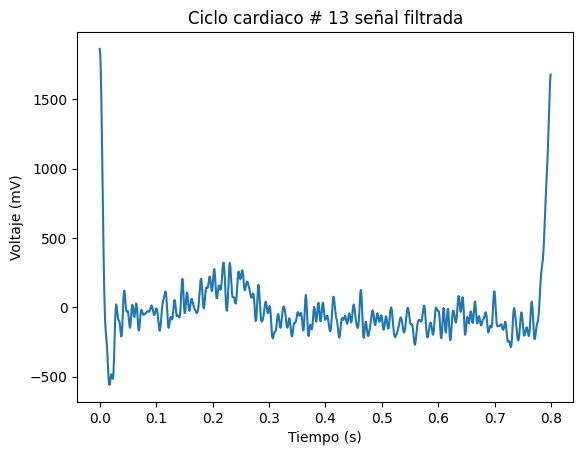

El valor de la varianza del ciclo 13 es 57497.79654654049
El valor del promedio del ciclo 13 es -22.36403015132936


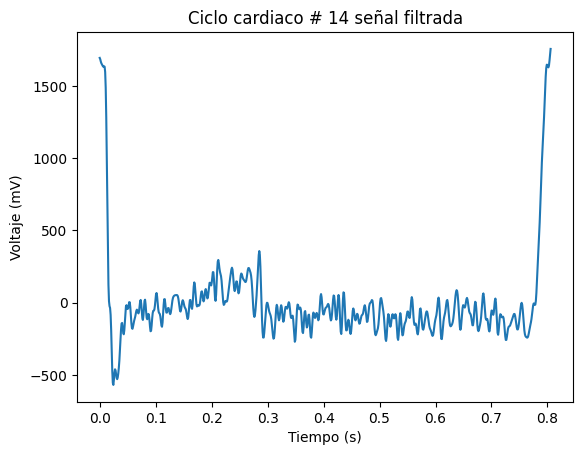

El valor de la varianza del ciclo 14 es 110555.49438709108
El valor del promedio del ciclo 14 es 0.2879364678716674


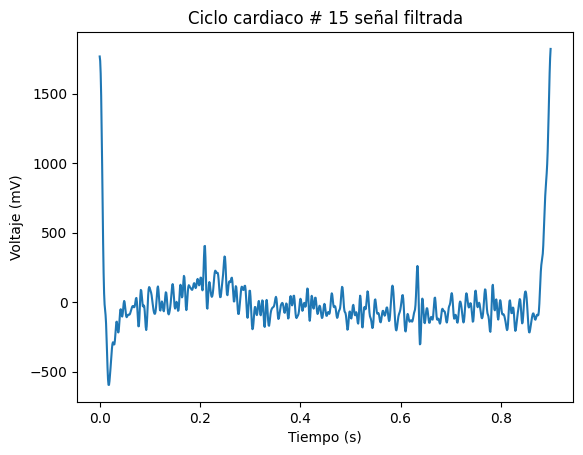

El valor de la varianza del ciclo 15 es 52288.22232891352
El valor del promedio del ciclo 15 es -4.650604944364294


In [28]:
limites_ciclos = [
    (0, 1024),
    (1024, 2048),
    (2048, 3072),
    (3072, 4096),
    (4096, 5120),
    (5120, 6144),
    (6144, 7168),
    (7168, 8192),
    (8192, 9216),
    (9216, 10240),
    (10240, 11264),
    (11264, 12288),
    (12288, 13312),
    (13312, 14336),
    (14336, 15360),
    (15360, 16384)
    
]
index_list = []
for i in np.arange(0,len(limites_ciclos)):
    rec1f=ecg['ECG_filtered'][0,limites_ciclos[i][0]:limites_ciclos[i][1]] 
    max1f=np.max(rec1f)  # Se busca el valor máximo en rec1f.
    index_max1f=1024*i+(rec1f.tolist().index(max1f))
    index_list.append(index_max1f)
    
for i in np.arange(0,len(index_list)-1):
    ciclof=ecg['ECG_filtered'][0,index_list[i]:index_list[i+1]]
    Vtiempo4=np.arange(0,ciclof.size*t,t)
    plt.plot(Vtiempo4,ciclof)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Voltaje (mV)')
    plt.title('Ciclo cardiaco # {} señal filtrada'.format(i+1))
    plt.show()
    varianza = np.var(ciclof)
    prom = np.mean(ciclof)
    print('El valor de la varianza del ciclo', i+1, 'es', varianza)
    print('El valor del promedio del ciclo', i+1, 'es', prom)

*Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.*

**Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).**

Se escogen para los análisis estadísticos comparar los ciclos 6 y 12, y para el otro análisis se escoge el ciclo 14 y 15. La cantidad de datos en cada uno de los ciclos es mayor a 50, por lo que se va a aplicar la prueba de Kolmogorov Smirnov para comprobar la normalidad y una prueba de Levene para la homocedasticidad de los datos.

In [32]:
#Análsis 1
#Prueba de normalidad

#Definir los ciclos
ciclo_6 = ecg['ECG_filtered'][0,index_list[5]:index_list[6]]
ciclo_12 = ecg['ECG_filtered'][0,index_list[11]:index_list[12]]

print(ciclo_6)
print(ciclo_12)

alpha = 0.05 #Se escogio un alpha de 0.05 para tener mayor tolerancia al error

print('Hipotesis de normalidad ciclo 6: ')
print('Ho: El ciclo 6 proviene de una distribución normal.')
print('Ha: El ciclo 6 no proviene de una distribución normal.')

#Normalidad ciclo 6
statistic, valor_c6 = stats.kstest(ciclo_6, 'norm')
print("Valor p:", valor_c6)
if valor_c6 < alpha:
    print("Los datos del ciclo 6 no siguen una distribución normal, la hipótesis nula se rechaza (Ho). ")
    norm6 = False
else:
    print("Los datos del ciclo 6 siguen una distribución normal, la hipótesis nula no se rechaza (Ho). ")
    norm6 = True

#Normalidad ciclo 12
statistic, valor_c12 = stats.kstest(ciclo_12, 'norm')
print("Valor p:", valor_c12)
if valor_c12 < alpha:
    print("Los datos del ciclo 12 no siguen una distribución normal, la hipótesis nula se rechaza (Ho). ")
    norm12 = False
else:
    print("Los datos del ciclo 12 siguen una distribución normal, la hipótesis nula no se rechaza (Ho). ")
    norm12 = True

#Prueba de homocedasticidad 

print('Prueba de homocedasticidad')
print('Ho: Las varianzas entre el ciclo 6 y el ciclo 12 son homogéneas.')
print('Ha: Las varianzas entre el ciclo 6 y el ciclo 12 no son homogéneas.')
statistic, resultado_prueba = stats.levene(ciclo_6, ciclo_12)
print("Valor p:", resultado_prueba)
if resultado_prueba > alpha:
    homs = True
    print("Homocedasticidad detectada entre el ciclo 5 y 8, la hipótesis nula no se rechaza (Ho).")
else:
    print("Homocedasticidad no detectada entre el ciclo 5 y 8, la hipótesis nula se rechaza (Ho).")
    homs = False


if norm12 and norm6 and homs:
    print('Los datos cumplen con los supuestos para realizar la prueba parametrica T')
else:
    print('Los datos no cumplen con los supuestos para realizar la prueba parametrica T, por lo cual se va a aplicar la prueba Mann-Whitney')



[1862.6246152  1852.97280213 1833.24638605 ... 1694.47629797 1748.8982435
 1803.13537803]
[1861.69112637 1822.71635045 1696.65012349 ... 1725.92246687 1779.33091163
 1838.97155985]
Hipotesis de normalidad ciclo 6: 
Ho: El ciclo 6 proviene de una distribución normal.
Ha: El ciclo 6 no proviene de una distribución normal.
Valor p: 0.0
Los datos del ciclo 6 no siguen una distribución normal, la hipótesis nula se rechaza (Ho). 
Valor p: 0.0
Los datos del ciclo 12 no siguen una distribución normal, la hipótesis nula se rechaza (Ho). 
Prueba de homocedasticidad
Ho: Las varianzas entre el ciclo 6 y el ciclo 12 son homogéneas.
Ha: Las varianzas entre el ciclo 6 y el ciclo 12 no son homogéneas.
Valor p: 0.6998669245662057
Homocedasticidad detectada entre el ciclo 5 y 8, la hipótesis nula no se rechaza (Ho).
Los datos no cumplen con los supuestos para realizar la prueba parametrica T, por lo cual se va a aplicar la prueba Mann-Whitney


Se asume que los valores de P en las pruebas de normalidad son muy cercanos a cero, por lo que existe un fuerte rechazo de la distribución de los datos a la hipótesis nula. De esto se concluye que los datos de los ciclos 6 y 12 no distribuyen normal. 
De la prueba de Levene se obtuvo un P mayor al alfa determinado, por lo cual se concluye que las varianzas de los ciclos 6 y 12 son homogéneas.